# 기말고사 
### 다변량통계분석: 2021년 1학기 

<font color=blue>
    
-	*각 문항에 답을 하기 위해 사용된 코드, 그래프, 표, 통계량 등을 반드시 모두 제시하세요.*
- *손으로 답안을 작성하는 것이 편한 문제는 종이에 자유롭게 작성하여 사진을 찍어서 업로드 하면 됩니다. 단, 반드시 해당 문제의 답안 칸에 **"답안을 별도로 업로드 하였음"**이라고 표기해주세요.*
- *아래의 문제에 답을 채워넣은 뒤 모든 결과물이 프린트 된 상태에서 `File>Download as>HTML(.html)` 형식으로 저장하여 e-campus를 통해 제출하세요. *
- *본인의 계정으로 개인의 Zoom 회의실을 열고 "전체화면 공유"를 하여 시험시간 동안의 화면을 녹화하여 제출하세요.*

#### 1. 두 개의 변수 x1, x2의 공분산 행렬이 아래와 같다. 
$$ \Sigma = \begin{bmatrix}
3&2\\
2&3
\end{bmatrix}$$
#### (a)  spectral decomposition을 통해 $\Sigma$의 고유값과 고유벡터를 구하시오. 


det(sigma - lambda * I) = (3 - lambda) * (3 - lambda) - 2 * 2 = 0 이므로 sigma의 고유값은 1,5이고

lambda가 1일때 고유벡터는 (1/root(2), -1/root(2))이고, lambda가 5일때 고유벡터는 (1/root(2), 1/root(2))이다.

자세한 풀이는 별도로 업로드

#### (b) x1과 x2에 대해 주성분 분석을 수행하면 구해지는  첫 번째 주성분 PC1을 x1과 x2의 선형결합으로 표현하시오. (위의 (a)의 결과를 활용)

답) 첫번째 PC = (1/root(2)) * x1 + (1/root(2)) * x2

자세한 풀이는 별도로 업로드

#### (c) 위의 (b)에서 구한 PC1은 총 분산의 몇 %를 설명하는가? 

답) 83.3% 

lamba1 = 5, lambda2 = 1이므로 PC1이 설명하는 총 분산의 비율은 (lambda1/(lambda1+lambda2)이므로 5/6에 해당하는 83.3%이다.

자세한 풀이는 별도로 업로드

#### 2. 군집분석에 대한 다음의 서술에 대해 True/False를 구분하고 False인 경우 그 이유를 설명하시오. 
#### (a) K-means clustering은 시행할 때마다 동일한 군집결과를 얻는다. 

답) False, Kmeans clustering의 경우에는 초기 파티션과 초기 시드에 다라 결과가 달라질 수 있기 때문에 시행할 때마다 동일한 군집 결과를 얻을 수 없다.

#### (b) Linkage clustering은 시행할 때마다 동일한 군집결과를 얻는다.

답) True

#### (c) Linkage clustering은 군집 개수를 사전에 설정해야 한다. 

답) False, 군집 갯수는 사전에 결정하지 않는다. Linkage clustering의 경우에는 군집 간의 거리 차이에 큰 변화를 보이는 경우를 고려하여 군집의 개수를 사후에 결정한다.




#### (d) DBSCAN은 군집 개수를 사전에 설정해야 한다. 

답) False, DBSCAN의 경우에 eps와 minPts를 결정해주면 군집의 개수가 자동선택된다.

#### (e) Gaussian mixture model에 기반한 clustering은 BIC를 기준으로 최적의 군집개수와 공분산 행렬의 형태를 결정할 수 있다. 

답) True

#### 3. College30.csv 데이터셋은 1995년 US News와 World Report에 수록된 30개 대학교에 대한 기록을 포함하고 있다. 한 교육부 관계자는 아래의 변수들을 사용하여 각 대학의 특성을 파악하고자 한다. 


|변수명   |내용   |
|---|---|
|Top10perc|	고교성적 상위 10% 학생의 비율|
|Personal|	개인 지출|
|S.F.Ratio|	교수 1인당 학생 비율|
|perc.alumni|	졸업생 기부 비율|
|Expend|	학생 1인당 교육지출|
|Grad.Rate|	졸업률|
|Acc_rate|	대입 합격자 수 / 대입 지원자 수 |
|Enrl_rate|	등록 신입생 수 / 대입 합격자 수 |




In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
data_path = '../data/'

In [6]:
data = pd.read_csv(data_path + "College30.csv", index_col=0)
data.head()

,Top10perc,Personal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Acc_rate,Enrl_rate
Princeton University,90,1575,8.4,54,28320,99,0.154486,0.564643
Harvard University,90,1920,9.9,52,37219,100,0.156149,0.741801
Yale University,95,2115,5.8,49,40386,99,0.229145,0.536894
Amherst College,83,1598,8.4,63,21424,100,0.230590,0.421371
Brown University,87,1100,7.6,39,20440,97,0.257349,0.451374


#### (a) 데이터를 표준화 한 후 8개의 변수를 사용하여 PCA 분석을 수행하고 각 주성분이 설명하는 총 분산의 비율을 프린트 하시오. 

In [9]:
X_scale = StandardScaler().fit_transform(data)

In [10]:
data.shape, X_scale.shape

((30, 8), (30, 8))

In [11]:
pca = PCA().fit(X_scale)

In [37]:
pca.explained_variance_ratio_

array([0.47364012, 0.19555032, 0.12525279, 0.09590205, 0.04219235,
       0.03950054, 0.02140291, 0.00655891])

PC1, PC2, PC3순으로 각각의 주성분이 설명하는 총 분산의 비율은 47.3%, 19.6%, 12.5%이다. (PC4~PC7이 설명하는 분산의 비율은 각각 9.6%, 4.2%, 4.0%, 2.1%, 0.7%이다.)

In [38]:
pd.DataFrame(pca.explained_variance_ratio_,
            index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

,0
PC1,0.473640
PC2,0.195550
PC3,0.125253
PC4,0.095902
PC5,0.042192
PC6,0.039501
PC7,0.021403
PC8,0.006559


#### (b) 아래의 두 가지 기준에 의해 적절한 축소 차원의 수를 결정하시오. 
#### (b-1) 주성분이 설명하는 총 설명의 비율이 70% 이상이 되는 최소 차원 

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47364012, 0.66919044, 0.79444323, 0.89034528, 0.93253763,
       0.97203817, 0.99344109, 1.        ])

답) 총 설명의 비율이 70%이상이 되는 최소차원은 3차원이다.
7개의 변수를 3개의 주성분점수로 축약할 때, 총분산의 79.4% 설명가능하다.

#### (b-2) 고유값이 1 이하인 주성분을 제외

In [18]:
pca.explained_variance_

array([3.91978029, 1.6183475 , 1.03657479, 0.79367212, 0.34917809,
       0.32690105, 0.17712756, 0.05428066])

답) 고유값이 1이하인 주성분을 제외하면 3차원으로 축소시킬 수 있다.

#### (c) 첫 두 개의 주성분을 사용하여 행렬도(biplot)을 그리시오. (대학 이름을 함께 프린트) 

In [19]:
def biplot(score,coeff, labels=None, index =data.index):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], str(i))
        else:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], index[i])

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [20]:
x_reduced = pca.transform(X_scale)

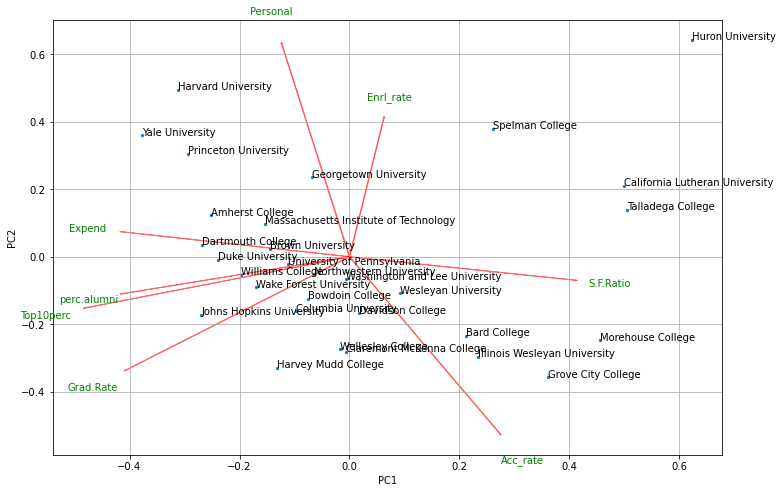

In [21]:
plt.figure(figsize=(12,8))
biplot(x_reduced[:,0:2],np.transpose(pca.components_[0:2, :]), data.columns )

#### (d) 행렬도를 통해 Harvard University와 Huron University의 특성을 원변수 차원에서 비교하여 설명하시오. 

답) harvard university와 huron university 모두 Personal이라는 변수에서 높은 값을 가지며, Acc_rate에 대해서는 모두 낮은 값을 가진다

huron univrsity의 경우에는 Personal, Enrl_rate, SF Ratio에서 높은 값을 가지며, 나머지 변수에 대해서는 적은 값을 가진다.

harvard university의 경우네는 Personal, Expend, perc.alumni, Top10 perc, Grad Rate, Enri_rate에서 높은 값을 가지나, S.F Ratio와 Acc_rate에 대해서는 낮은 값을 가진다.

#### (e) 첫 두 개의 주성분 점수를 활용하여 ward's method로 군집분석을 실시하고 dendrogram을 프린트하시오. 

In [25]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

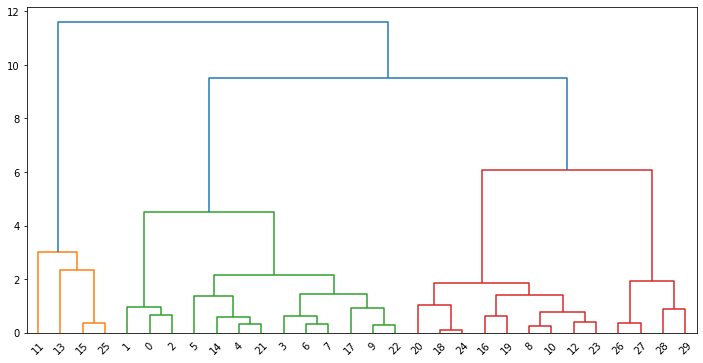

In [50]:
hc_ward = linkage(x_reduced[:,0:2], method="ward")

plt.figure(figsize = (12,6))
dendrogram(hc_ward)
plt.show()

#### 4. 한 항공사의 고객만족도 설문조사 결과를 사용하여 Exploratory Factor Analysis를 진행한 결과 아래와 같은 요인적재행렬(factor loading matrix)을 얻었다. (표준화 된 변수에 대해 분석을 수행한 결과임)


|    |Factor 1|Factor 2| Factor 3|
|----|--------|--------|---------|
|Great hospitatliy| 0.98| -0.04|0.02|
|Flight is on time| 0.95|-0.01|0.18|
|Great Food|0.92|0.04|-0.05|
|Friendly atmosphere|0.62|0.17|-0.33|
|Frequently flyer program|-0.03|0.97|-0.01|
|Flights are economic|-0.02|0.96|0.09|
|No hassles in boarding|-0.07|0.95|0.09|
|Good flight times| -0.09|0.19|0.96|
|Seats are comfortable|0.03|0.09|0.95|
|Loyalty or attachment|-0.19|-0.42|-0.09|

#### (a) Factor1으로부터 상대적으로 큰 영향을 받는 변수들을 나열하시오. 


답) Great hospitatliy, Flight is on time, , Great Food, (Friendly atmosphere의 경우에는 앞의 3개의 변수만큼 큰 영향은 아니지만 비교적 큰 영향을 준다고 할 수 있다.)

#### (b) Great hospitality의 분산 중 3개의 Factor가 설명하는 분산의 비율을 구하시오. 

In [51]:
(0.98)**2+(-0.04)**2+(0.02)**2

0.9623999999999999

답) 3개의 Factor가 설명하는 분산의 비율은 96.2%이다